<a href="https://colab.research.google.com/github/nguyenphucloc22/test/blob/main/Exercise_Fuzzy_W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 40.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=de5a719fff00bed05824cde840d7f0b19fbd91a611a0818d394a0bef4f17244e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


74.99999999999999


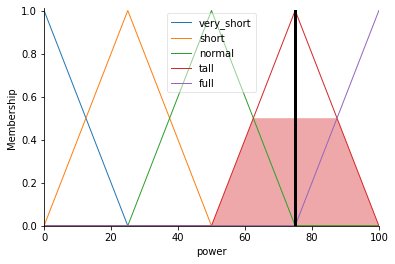

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


time=ctrl.Antecedent(np.arange(10,181,1),'time')
rice=ctrl.Antecedent(np.arange(100,1001,1),'rice')
power=ctrl.Consequent(np.arange(0,101,1),'power')


time['very_fast']=fuzz.trimf(time.universe,[10,10,40])
time['fast']=fuzz.trimf(time.universe,[10,40,80])
time['normal']=fuzz.trimf(time.universe,[40,80,120])
time['slow']=fuzz.trimf(time.universe,[90,140,160])
time['very_slow']=fuzz.trimf(time.universe,[140,180,180])

rice['very_less']=fuzz.trimf(rice.universe,[100,100,250])
rice['less']=fuzz.trimf(rice.universe,[150,300,500])
rice['normal']=fuzz.trimf(rice.universe,[300,550,650])
rice['much']=fuzz.trimf(rice.universe,[600,700,800])
rice['very_much']=fuzz.trimf(rice.universe,[750,1000,1000])

power['very_short']=fuzz.trimf(power.universe,[0,0,25])
power['short']=fuzz.trimf(power.universe,[0,25,50])
power['normal']=fuzz.trimf(power.universe,[25,50,75])
power['tall']=fuzz.trimf(power.universe,[50,75,100])
power['full']=fuzz.trimf(power.universe,[75,100,100])

rule1=ctrl.Rule(time['very_fast']&rice['very_less'],power['normal'])
rule2=ctrl.Rule(time['very_fast']&rice['less'],power['tall'])
rule3=ctrl.Rule(time['very_fast']&rice['normal'],power['tall'])
rule4=ctrl.Rule(time['very_fast']&rice['much'],power['full'])
rule5=ctrl.Rule(time['very_fast']&rice['very_much'],power['full'])

rule6=ctrl.Rule(time['fast']&rice['very_less'],power['normal'])
rule7=ctrl.Rule(time['fast']&rice['less'],power['normal'])
rule8=ctrl.Rule(time['fast']&rice['normal'],power['tall'])
rule9=ctrl.Rule(time['fast']&rice['much'],power['tall'])
rule10=ctrl.Rule(time['fast']&rice['very_much'],power['full'])

rule11=ctrl.Rule(time['normal']&rice['very_less'],power['short'])
rule12=ctrl.Rule(time['normal']&rice['less'],power['short'])
rule13=ctrl.Rule(time['normal']&rice['normal'],power['normal'])
rule14=ctrl.Rule(time['normal']&rice['much'],power['normal'])
rule15=ctrl.Rule(time['normal']&rice['very_much'],power['tall'])

rule16=ctrl.Rule(time['slow']&rice['very_less'],power['very_short'])
rule17=ctrl.Rule(time['slow']&rice['less'],power['very_short'])
rule18=ctrl.Rule(time['slow']&rice['normal'],power['short'])
rule19=ctrl.Rule(time['slow']&rice['much'],power['short'])
rule20=ctrl.Rule(time['slow']&rice['very_much'],power['normal'])

rule21=ctrl.Rule(time['very_slow']&rice['very_less'],power['very_short'])
rule22=ctrl.Rule(time['very_slow']&rice['less'],power['short'])
rule23=ctrl.Rule(time['very_slow']&rice['normal'],power['short'])
rule24=ctrl.Rule(time['very_slow']&rice['much'],power['normal'])
rule25=ctrl.Rule(time['very_slow']&rice['very_much'],power['normal'])

PW_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,
                               rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,
                               rule20,rule21,rule22,rule23,rule24,rule25])
PW=ctrl.ControlSystemSimulation(PW_ctrl)
PW.input['time']=40
PW.input['rice']=600
PW.compute()
print(PW.output['power'])
power.view(sim=PW)